In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/earthquake-data-by-usgs-6-jun23-6-jul23/earthquakes.csv


## Importing Libraries

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import poisson,expon
import seaborn as sns

## Loading Dataset

In [63]:
df = pd.read_csv('/kaggle/input/earthquake-data-by-usgs-6-jun23-6-jul23/earthquakes.csv')

In [64]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-07-06T12:17:32.110Z,32.721333,-115.533833,10.95,1.49,ml,12.0,72.00,0.085460,0.2300,...,2023-07-06T12:21:16.480Z,"1km SSW of Heber, CA",earthquake,0.70,1.49,0.240000,14.0,automatic,ci,ci
1,2023-07-06T12:15:44.456Z,61.694100,-150.826300,56.20,1.20,ml,NaN,NaN,NaN,0.5900,...,2023-07-06T12:19:16.424Z,"23 km NW of Susitna, Alaska",earthquake,NaN,1.30,NaN,NaN,automatic,ak,ak
2,2023-07-06T12:09:09.772Z,36.768600,-116.252800,9.00,0.00,ml,11.0,98.07,0.052000,0.0473,...,2023-07-06T12:10:50.211Z,"47 km ESE of Beatty, Nevada",earthquake,NaN,1.20,0.180000,9.0,automatic,nn,nn
3,2023-07-06T12:06:16.697Z,60.143300,-152.928600,88.90,1.10,ml,NaN,NaN,NaN,0.0600,...,2023-07-06T12:07:12.888Z,Southern Alaska,earthquake,NaN,5.20,NaN,NaN,automatic,ak,ak
4,2023-07-06T12:01:58.670Z,17.998667,-66.964833,5.29,2.33,md,3.0,191.00,0.080960,0.0500,...,2023-07-06T12:19:52.500Z,"5 km WNW of Fuig, Puerto Rico",earthquake,1.60,2.31,0.059049,3.0,reviewed,pr,pr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10752,2023-06-06T12:52:34.560Z,38.820499,-122.821831,2.08,0.54,md,13.0,55.00,0.009628,0.0100,...,2023-06-06T15:20:13.569Z,"7km NW of The Geysers, CA",earthquake,0.28,0.68,0.290000,13.0,automatic,nc,nc
10753,2023-06-06T12:49:19.134Z,53.627600,-163.491700,25.50,2.10,ml,NaN,NaN,NaN,0.6400,...,2023-06-15T00:29:27.989Z,"136 km S of False Pass, Alaska",earthquake,NaN,1.80,NaN,NaN,reviewed,ak,ak
10754,2023-06-06T12:48:07.987Z,65.347600,-144.634700,8.90,0.90,ml,NaN,NaN,NaN,0.7800,...,2023-06-11T08:18:01.224Z,"26 km SSE of Central, Alaska",earthquake,NaN,0.60,NaN,NaN,reviewed,ak,ak
10755,2023-06-06T12:45:57.040Z,58.181333,-155.312667,2.09,-0.06,ml,8.0,104.00,NaN,0.0800,...,2023-06-08T22:07:52.700Z,"85 km NW of Karluk, Alaska",earthquake,0.23,0.41,0.340733,8.0,reviewed,av,av


## Cleaning and Formatting Data

**Column Place contains direction,US state or name of other countries.**

In [65]:
df[['direction','us_place/country']] = df['place'].str.split(',',expand=True).iloc[:,0:2]

In [66]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,direction,us_place/country
0,2023-07-06T12:17:32.110Z,32.721333,-115.533833,10.95,1.49,ml,12.0,72.00,0.085460,0.2300,...,earthquake,0.70,1.49,0.240000,14.0,automatic,ci,ci,1km SSW of Heber,CA
1,2023-07-06T12:15:44.456Z,61.694100,-150.826300,56.20,1.20,ml,NaN,NaN,NaN,0.5900,...,earthquake,NaN,1.30,NaN,NaN,automatic,ak,ak,23 km NW of Susitna,Alaska
2,2023-07-06T12:09:09.772Z,36.768600,-116.252800,9.00,0.00,ml,11.0,98.07,0.052000,0.0473,...,earthquake,NaN,1.20,0.180000,9.0,automatic,nn,nn,47 km ESE of Beatty,Nevada
3,2023-07-06T12:06:16.697Z,60.143300,-152.928600,88.90,1.10,ml,NaN,NaN,NaN,0.0600,...,earthquake,NaN,5.20,NaN,NaN,automatic,ak,ak,Southern Alaska,None
4,2023-07-06T12:01:58.670Z,17.998667,-66.964833,5.29,2.33,md,3.0,191.00,0.080960,0.0500,...,earthquake,1.60,2.31,0.059049,3.0,reviewed,pr,pr,5 km WNW of Fuig,Puerto Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10752,2023-06-06T12:52:34.560Z,38.820499,-122.821831,2.08,0.54,md,13.0,55.00,0.009628,0.0100,...,earthquake,0.28,0.68,0.290000,13.0,automatic,nc,nc,7km NW of The Geysers,CA
10753,2023-06-06T12:49:19.134Z,53.627600,-163.491700,25.50,2.10,ml,NaN,NaN,NaN,0.6400,...,earthquake,NaN,1.80,NaN,NaN,reviewed,ak,ak,136 km S of False Pass,Alaska
10754,2023-06-06T12:48:07.987Z,65.347600,-144.634700,8.90,0.90,ml,NaN,NaN,NaN,0.7800,...,earthquake,NaN,0.60,NaN,NaN,reviewed,ak,ak,26 km SSE of Central,Alaska
10755,2023-06-06T12:45:57.040Z,58.181333,-155.312667,2.09,-0.06,ml,8.0,104.00,NaN,0.0800,...,earthquake,0.23,0.41,0.340733,8.0,reviewed,av,av,85 km NW of Karluk,Alaska


In [67]:
#Dropping place column
df.drop('place',axis=1,inplace=True)

In [68]:
#created list of places from column 'us_place/country' which are in us
us_places = [' CA', ' Alaska', ' Nevada', ' Puerto Rico', ' Utah', ' Virginia', ' Washington', ' New Mexico', ' Hawaii', ' California', ' Oklahoma', ' Texas', ' Kentucky', ' Nebraska', ' Oregon', ' Colorado', ' Arizona', ' New York', ' Arkansas', ' South Carolina', ' Romania', ' North Carolina', ' Kansas', ' U.S. Virgin Islands', ' Northern Mariana Islands', ' Guam', ' American Samoa', ' District of Columbia', ' Puerto Rico', ' United States Minor Outlying Islands']

In [69]:
#Creating column country which has only country names 
country = list()
for i in df['us_place/country']:
    if i in us_places:
        country.append('USA')
    else:
        country.append(i)
df['country'] = country

In [70]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,direction,us_place/country,country
0,2023-07-06T12:17:32.110Z,32.721333,-115.533833,10.95,1.49,ml,12.0,72.00,0.085460,0.2300,...,0.70,1.49,0.240000,14.0,automatic,ci,ci,1km SSW of Heber,CA,USA
1,2023-07-06T12:15:44.456Z,61.694100,-150.826300,56.20,1.20,ml,NaN,NaN,NaN,0.5900,...,NaN,1.30,NaN,NaN,automatic,ak,ak,23 km NW of Susitna,Alaska,USA
2,2023-07-06T12:09:09.772Z,36.768600,-116.252800,9.00,0.00,ml,11.0,98.07,0.052000,0.0473,...,NaN,1.20,0.180000,9.0,automatic,nn,nn,47 km ESE of Beatty,Nevada,USA
3,2023-07-06T12:06:16.697Z,60.143300,-152.928600,88.90,1.10,ml,NaN,NaN,NaN,0.0600,...,NaN,5.20,NaN,NaN,automatic,ak,ak,Southern Alaska,None,None
4,2023-07-06T12:01:58.670Z,17.998667,-66.964833,5.29,2.33,md,3.0,191.00,0.080960,0.0500,...,1.60,2.31,0.059049,3.0,reviewed,pr,pr,5 km WNW of Fuig,Puerto Rico,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10752,2023-06-06T12:52:34.560Z,38.820499,-122.821831,2.08,0.54,md,13.0,55.00,0.009628,0.0100,...,0.28,0.68,0.290000,13.0,automatic,nc,nc,7km NW of The Geysers,CA,USA
10753,2023-06-06T12:49:19.134Z,53.627600,-163.491700,25.50,2.10,ml,NaN,NaN,NaN,0.6400,...,NaN,1.80,NaN,NaN,reviewed,ak,ak,136 km S of False Pass,Alaska,USA
10754,2023-06-06T12:48:07.987Z,65.347600,-144.634700,8.90,0.90,ml,NaN,NaN,NaN,0.7800,...,NaN,0.60,NaN,NaN,reviewed,ak,ak,26 km SSE of Central,Alaska,USA
10755,2023-06-06T12:45:57.040Z,58.181333,-155.312667,2.09,-0.06,ml,8.0,104.00,NaN,0.0800,...,0.23,0.41,0.340733,8.0,reviewed,av,av,85 km NW of Karluk,Alaska,USA


In [71]:
#Since, 'CA' and 'California' are same. Updating values

df['us_place/country'] = df['us_place/country'].str.replace(' CA',' California')
df['us_place/country']

0          California
1              Alaska
2              Nevada
3                None
4         Puerto Rico
             ...     
10752      California
10753          Alaska
10754          Alaska
10755          Alaska
10756          Alaska
Name: us_place/country, Length: 10757, dtype: object

## Checking Data Types

In [72]:
df.dtypes

time                 object
latitude            float64
longitude           float64
depth               float64
mag                 float64
magType              object
nst                 float64
gap                 float64
dmin                float64
rms                 float64
net                  object
id                   object
updated              object
type                 object
horizontalError     float64
depthError          float64
magError            float64
magNst              float64
status               object
locationSource       object
magSource            object
direction            object
us_place/country     object
country              object
dtype: object

In [73]:
# column time and updated contains 'T'(for space) and 'Z'(UTC) in time, so cleaning value
df['time'] = df['time'].str.replace('T',' ')
df['time'] = df['time'].str.replace('Z','')
df['time'] = pd.to_datetime(df['time'],format='%Y-%m-%d %H:%M:%S.%f')
df['updated'] = df['updated'].str.replace('T',' ')
df['updated'] = df['updated'].str.replace('Z',' ')
df['updated'] = pd.to_datetime(df['updated'],format='%Y-%m-%d %H:%M:%S.%f')

**Just Acknowlding Missing Values, We can not replace here**

In [74]:
df.isna().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                    0
magType                0
nst                 2956
gap                 2956
dmin                4854
rms                    0
net                    0
id                     0
updated                0
type                   0
horizontalError     3659
depthError             0
magError            2980
magNst              2965
status                 0
locationSource         0
magSource              0
direction              0
us_place/country    1153
country             1153
dtype: int64

## Analyzing seismic events Data

**Since, Number of seismic events is poisson process because it vary over a wide range, so probability of number of seismic events falls under poisson probability distribution. We have need to choose a fixed interval of time.**

**Choosing fixed interval of time : day**

In [75]:
df['month-day of time'] = df['time'].dt.strftime('%m-%d')
placewise_event_count = df.pivot_table(index='us_place/country',values='id',columns='month-day of time',aggfunc=np.count_nonzero)
california_events = placewise_event_count.loc[' California']
california_events

month-day of time
06-06     39.0
06-07    106.0
06-08     93.0
06-09    103.0
06-10    104.0
06-11     88.0
06-12     81.0
06-13     93.0
06-14     96.0
06-15     94.0
06-16     72.0
06-17     80.0
06-18     85.0
06-19     93.0
06-20     85.0
06-21     93.0
06-22     72.0
06-23     85.0
06-24    130.0
06-25    133.0
06-26    118.0
06-27     96.0
06-28    111.0
06-29     94.0
06-30    113.0
07-01     92.0
07-02    109.0
07-03    110.0
07-04     75.0
07-05     84.0
07-06     50.0
Name:  California, dtype: float64

Average value of poisson distribution is  95.9


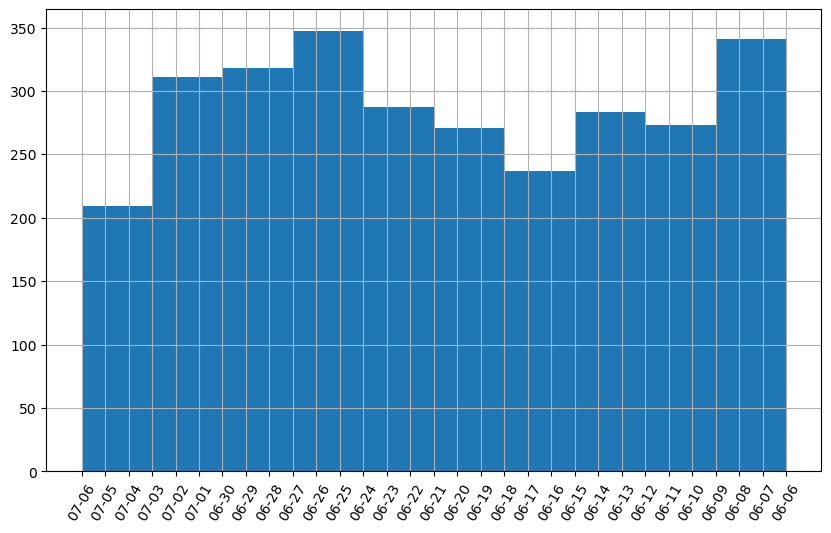

In [76]:
plt.figure(figsize=(10,6))
df[df['us_place/country']==' California']['month-day of time'].hist()
plt.xticks(rotation=60)
total_seismic_events_california = sum(california_events)
#Since, we have data from noon of 6 June to noon of 7th July, we have to minus 1 from number of days
days = len(california_events)-1 
avg_events_day = total_seismic_events_california  /days
print('Average value of poisson distribution is ',avg_events_day)
plt.show()

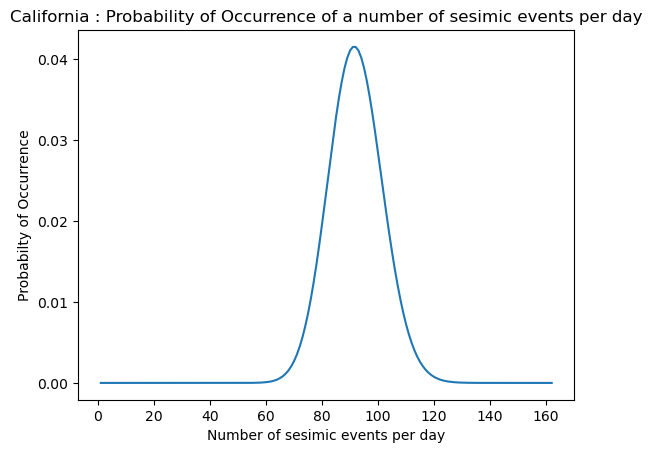

In [77]:
max_events = california_events.max()
'''adding 30 because I want to know that what will be probability of occuerence
number of events more than maximum in a day '''
upper_value = int(max_events)+30 
x = list(range(1,upper_value))
y = poisson.pmf(x,mu=92) #getting probabilty
plt.plot(x,y)
plt.xlabel('Number of sesimic events per day')
plt.ylabel('Probabilty of Occurrence')
plt.title('California : Probability of Occurrence of a number of sesimic events per day')
plt.show()

**A poisson distribution is always has peak at its lambda(mean) value.**

**Choosing fixed interval of time : Hour**

In [78]:
starting_time = df['time'].min()
ending_time = df['time'].max()
time_span = ending_time -  starting_time
print(time_span)

29 days 23:46:08.394000


In [79]:
total_hours = 30*24
avg_events_hour = total_seismic_events_california/total_hours
avg_events_hour

3.995833333333333

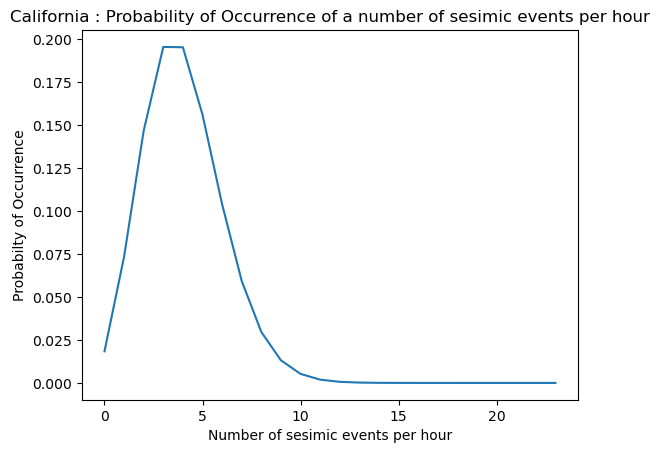

In [83]:
x = list(range(0,24)) # from 0th hour to 23th hour
y = poisson.pmf(x,avg_events_hour)
plt.plot(x,y)
plt.xlabel('Number of sesimic events per hour')
plt.ylabel('Probabilty of Occurrence')
plt.title('California : Probability of Occurrence of a number of sesimic events per hour')
plt.show()

**A poisson distribution is always has peak at its lambda(mean) value.**

**Exponential Probability Distribution**

**It tells about probability of time passing between two poisson events (for a unit of time). It is a continous distribution because it deals with time.**

In [87]:
print('average events per hour ',avg_events_hour)
time_per_event = 1/avg_events_hour
time_per_event_min = time_per_event*60
print('Time between two events is ',time_per_event_min,' in minutes')

average events per hour  3.995833333333333
Time between two events is  15.015641293013557  in minutes


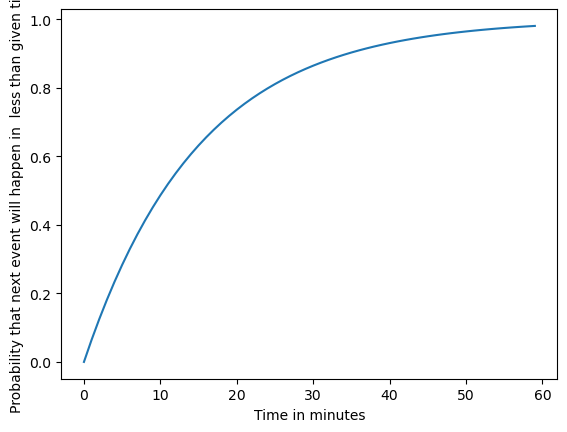

In [99]:
x = list(range(0,60))
y = expon.cdf(x,scale= time_per_event_min) 
plt.plot(x,y)
plt.xlabel('Time in minutes')
plt.ylabel('Probability that next event will happen in  less than given time')
plt.show()

**Since, average time gap between two events is 15 minutes, then most probably probability of waiting time between two events for less than 60 minutes is 1.**